In [129]:
from IPython.display import HTML
HTML('''<style>
.jp-Cell, .jp-MarkdownCell {
    max-width: 70vw !important;
    margin: 3px auto !important;
    /* text-align: justify !important; */
}

.jp-MarkdownOutput {
    font-size: 18px !important;
    max-width: 900px !important;
    margin: 0 auto !important;
    /* text-align: justify !important; */
}

/* Additional markdown elements styling */
.jp-MarkdownOutput h1 {
    font-size: 2rem !important;
    background-color: red;
}

.jp-MarkdownOutput h2 {
    font-size: 1.5rem !important;
}

.jp-MarkdownOutput p {
    line-height: 1.5 !important;
    font-size: 1.3rem!important;
    background-color: blueviolet !important;
}

.input_area {
  max-height: 300px !important;
  overflow-y: auto !important;
}

h2 {
    background-color: blueviolet;
} </style>''')

<img style ="float:right;display:inline;z-index:0;margin-right:5rem"
src="./UOF-logo.png" alt-text="Logo de l'UOF, université innovante">
<h1 style="margin:auto;max-width:50rem;text-align:center">Ligne de temps générative <br> des technologies numériques</h1>

<img style ="float:right;display:inline;z-index:0;margin: 0 5rem"
src="./logo-ECN_small.png" alt-text="Logo du Pôle d'études et recherche en cultures numériques de l'UOF">
<h2 style="margin:auto;max-width:50rem;text-align:center">
L'évolution et les enjeux des agents d'IA conversationnelle 
</h2>

<h4 style="margin:auto;max-width:50rem;text-align:center;line-height:1.5">EXEMPLE de Travail assisté par IA générative réalisé dans le cadre du cours <em>ECN1003: Introduction aux technologies numériques</em>, <br> Session d'automne 2024
<br>Professeure responsable du cours: Sarah Choukah</h4>


Par : Sarah Choukah

Date : 11 décembre 2024

## Introduction 

Ce document est une initiative exploratoire visant à documenter du
travail avec de l'IA générative dans la collecte et l'analyse de
dates et données historiques marquantes des technologies numériques. 

Les données seront graduellement collectées, documentées et insérées dans une ligne de
temps à l'aide des librairies Python [Pandas](https://pandas.pydata.org/docs/) et
[Plotly Express](https://plotly.com/python/).

Pour construire cette ligne de temps, je me suis penchée sur l'histoire des
agents conversationnels. Je suis très intéressée par les multiples
façons dont les humains et les machines ont communiqué à travers les
âges. Je trouve aussi
l'étude des modes de communication que les humains ont développés avec
des non-humains fascinante. À travers ce type de communication, les
humains sont arrivés à contrôler et à cultiver des relations importantes
avec des entités qui ne
leur ressemblent en rien, et dont
les propriétés sont en constante évolution. 

Pour moi, l'idée de créer
des agents conversationnels tels que ceux qui se présentent sous la
forme de robots apporte autant d'immenses promesses que des périls. 

J'ai initialement interrogé ChatGPT avec les instructions suivantes: 

<img src="./prompt_example_ChatGPT.png" style="width: 50%; display: block;
margin: 0 auto; padding: 45" alt="Capture d'écran de l'instruction fournie à
ChatGPT">

<br>

<p>À ces instructions, ChatGPT à répondu avec des références vers des liens
non cliquables, ce que je lui ai demandé de corriger : </p>

« Pourrais- tu me donner des liens cliquables stp ? »

Les liens cette fois étaient bien cliquables, mais il menaient
vers des publications qui n'étaient pas pertinentes. Voici le [lien vers
la discussion entière que j'ai
eue](https://chatgpt.com/share/675a8d97-3628-800d-bf5f-4f73071f30c7).

Cela dit, j'ai lu assez de la réponse initiale pour générer mes propres
idées dans ma tête. En effet, lire sur le programme ELIZA de Joseph Weizenbaum, ainsi que sur
d'autres prototypes et programmes d'agents conversationnels, m'a fait
m'interroger sur les possibilités de créer des interfaces directement
connectées au cerveau humain plutôt que par des interfaces d'ordinateurs. 

## Événements historiques sélectionnés et sources choisies

Voici la première des cinq dates que j'ai trouvée à partir de ces
recommandations et réflexions initiales.

#### Lancement de l'interface humain-cerveau sans fil de la compagnie Neuralink et première implantation dans un cerveau de porc en août 2020;

Neuralink, une des compagnies d'Elon Musk, annonce au mois d'août 2020
qu'elle a implanté un dispositif servant d'interface dans le cerveau
de plusieurs porcs. Après avoir fait une recherche sommaire sur cet
événement en ligne, je constate que la nouvelle semble avoir été abondamment relayée. Elle
a été soulignée
dans les milieux des hautes technologies, de l'ingénierie, et de la
médecine, entre autres. J'ai choisi 👉 [ce commentaire publié dans la revue
Scientific American
](https://www.scientificamerican.com/article/elon-musks-pig-brain-implant-is-still-a-long-way-from-solving-paralysis/)
pour en traiter. Ce commentaire nous renseigne sur les éléments les plus
importants de la démonstration de prouesse technologique, tout en soulignant qu'il s'agissait d'une
démonstration visant, selon les dires de Musk, à attirer des talents. 

J'ai choisi cette date parce que, bien que cela ne semble pas évident au
premier regard, je vois des liens forts entre les développements les plus
récents des interfaces humains-cerveau et la montée en croissance très
rapide d'agents conversationnels. Je pense que, dans un avenir pas si
lointain, il sera possible d'implanter des puces microscopiques capables
de relier des agents conversationnels avec des cerveaux. Des prototypes
de micropuces
capables de connecter des cerveaux humains à Internet et de transmettre de l'information
dans les deux sens,
directement à ces cerveaux, sont désormais possibles. D'ailleurs, elles existent
déjà sous la forme d'une démonstration initiale, également très médiatisée, capable de transmettre de l'information
sans fil directement. C'est ce qu'a fait la compagnie d'Elon Musk 👉 [le 29
janvier
dernier](https://www.reuters.com/technology/neuralink-implants-brain-chip-first-human-musk-says-2024-01-29/)
avec de premiers essais cliniques d'implantation sur des êtres humains. 

In [85]:
# Entrons les principaux détails de cet événement sous forme de
# dictionnaire dans une variable: « date_1 ».

# Le dictionnaire se compose d'un événement qui servira d'étiquette
# (label), d'une date de début (pas besoin de date de fin dans ce
# cas-ci), ainsi que de détails. Les détails sont sous forme de chaîne
# de caractères et contiennent un hyperlien formatté en html. Cet
# hyperlien sera cliquable lorsque le curseur se posera sur l'événement
# pour en révéler les détails. 

date_1 = dict(
        Événement="Annonce de l'implantation d'une puce Neuralink dans un cerveau humain", 
        Début="2024",
        Détails="Un premier patient reçoit un implant cérébral Neuralink.<br><a style='color: #00ffff;' href='https://www.reuters.com/technology/neuralink-implants-brain-chip-first-human-musk-says-2024-01-29/'>→ Lien vers l'article de l'agence Reuters</a>"
    )

Une fois cette date commentée, je suis retournée sur ChatGPT pour continuer mon
exploration critique de sources. Et j'ai consulté à nouveau les
références cliquables pour me rendre compte qu'elles étaient non
seulement en manque de pertinence, mais que le texte généré comme
description comportait des erreurs. J'ai relevé la chose auprès du *chatbot*:

<img src="./Tu_te_trompes.png" alt="capture d'écran où j'indique que
ChatGPT se trompe" style="margin:auto;max-width:60%;">

ChatGPT n'a pas hésité à demander pardon avant de me trouver d'autres références: 

<p style="margin:auto;max-width:50%;background-color:#e0e0e0;padding:20px;">« Merci pour votre observation, et vous avez tout à fait raison. Les
deux articles que j’ai cités ne contiennent pas d’analyse historique
exhaustive, ni ne mentionnent des jalons comme ELIZA ou ALICE [...]
Voici quelques informations issues de recherches académiques récentes
qui pourraient répondre à vos attentes et éclairer les événements
historiques clés dans l’évolution des agents conversationnels ». </p>

#### Publication de l'article *Attention is all you need* (Vaswani et al. 2017)

J'ai continué mon exploration. De fil en aiguille, j'ai trouvé d'autres
références très intéressantes. Dans <a href="https://news.mit.edu/2023/explained-generative-ai-1109">cet article</a> d'Adam Zewe, 2017
apparaît comme une date cruciale pour le développement d'IA génératives
et donc, par extension, des agents conversationnels. Cette date
correspond à la publication d'un article intitulé « *Attention is all you
need* » par une équipe de chercheur.e.s de l'équipe derrière Google
Deepmind. Dans cet article, une nouvelle architecture est proposée pour
accélérer radicalement le temps passé à entraîner de grands modèles de
langage (Zewe, 2023).

In [121]:
# Ajoutons la nouvelle date, toujours sous forme de dictionnaire
# (notation alternative), dans une nouvelle variable.

date_2 = dict(
    Événement="Publication de l'article 'Attention is all you need'",
    Début="2017",
    Détails="Article fondateur sur l'architecture des transformeurs par Vaswani et al.<br><a style='color: #00ffff;text-align:left;' href='https://doi.org/10.48550/arXiv.1706.03762'>→ Lire l'article original</a>"
)

<h4>Le programme psychothérapeute ELIZA: 1966</h4>

Je me suis aussi souvenue d'avoir déjà lu sur ELIZA il y a quelques
années. Il s'agit d'un des premiers *chatbots* à avoir été rendu public selon Md. Al-Amin et al. (2024). Conçu par
Joseph Weizenbaum en 1966, ELIZA était
un programme texte interactif qui simulait
une thérapeute avec certaines phrases préprogrammées (Weizembaum, 1966). ELIZA a marqué le
développement technique des agents conversationnels : « Son
fonctionnement reposait sur la reconnaissance de mots-clés et de schémas
pour sélectionner des modèles de réponses prédéterminés. Il analysait le
texte saisi par l'utilisateur à la recherche de mots-clés et de schémas
reconnus, puis substituait ces mots-clés dans les modèles de réponses
correspondants pour générer automatiquement des réponses. » (*Ibid*, p.
6, traduction via Google Gemini Flash 1.5). 

In [122]:
date_3 = dict(
    Événement="Turing traite du «jeu d'imitation»",
    Début="1950",
    Détails="Publication de 'Computing Machinery and Intelligence'.<br><a style='color: #00ffff;' href='https://doi.org/10.1093/mind/LIX.236.433'>→ Consulter l'article original</a>"
)

ELIZA a d'autant plus piqué ma curiosité lorsque j'ai pris connaissance
de son rapport avec le test de Turing. Le concepteur de ce test, Alan
Turing, en a formulé les grandes lignes dans un article publié en 1950
dans la revue *Mind* (Turing, 1950). Plusieurs agents conversationnels,
dont ELIZA, ont été à soumis à ce test, souvent avec des résultats
ambivalents ou débattus (Orf, 2023). 

In [123]:
# Transformons aussi cette publication en dictionnaire et ajoutons-le
# avec la méthode `loc`, que nous connaissons déjà mieux.

date_4 = dict(
    Événement="Joseph Weizenbaum lance le programme ELIZA",
    Début="1966",
    Détails="Premier chatbot simulant un psychothérapeute.<br><a style='color: #00ffff;' href='https://doi.org/10.48550/arXiv.2402.05122'>→ Article sur l'histoire des <i>chatbots</i> traitant entre autres d'ELIZA.</a>"
)

En dernier lieu, pour équilibrer la répartition des
événements sur ma ligne, je me suis limité à trouver un événement
significatif entre les années 1970 et 1990.

Cela dit, cette fois, j'ai effectué une recherche en partant des
ressources disponibles à la bibliothèque de l'UOF. Sans *prompts*
très précis, rédigés avec beaucoup de soin et à travers de multiples
itérations, consulter ChatGPT
pour obtenir des sources valides s'avère frustrant. Et tant qu'à passer
des heures à taper des instructions à une IA générative, pourquoi ne pas
plutôt s'économiser l'effort et aller chercher du côté de ressources
spécialisées faites exactement pour le genre d'exercice auquel je me
prête ? ChatGPT a confirmé. 

<img src="./ChatGPT_est_nul.png" style="margin:auto;max-width:70%;display:block;" alt="Capture d'écran d'une dernière
conversation où ChatGPT me dit que c'est bien mieux de chercher dans les
bases de données.">

<h4>Création de Parry par Kenneth Colby en 1972</h4>

Une petite recherche sur CAIRN info avec les termes « Histoire IA
conversationnelle » me permet de trouver une référence très pertinente:
la conception de l'agent conversationnel Parry par Kenneth Colby,
psychiatre et chercheur à l'Université Stanford. L'auteur de l'article
qui en fait mention, Xavier Aimé, note que Parry était un programme « dont l’objet était cette
fois de modéliser le comportement d’un sujet atteint de schizophrénie
paranoïde » (2017, p. 53). 

Voilà, maintenant ajoutons cette dernière date sous forme de
dictionnaire à la ligne de temps.

In [124]:
date_5 = dict(
    Événement="Lancement du robot conversationnel Parry",
    Début="1972",
    Détails="Chatbot simulant un patient paranoïaque, créé par Kenneth Colby.<br><a style='color: #00ffff;' href='https://stm.cairn.info/revue-l-information-psychiatrique-2017-1-page-51'>→ Article de Xavier Aimé sur ELIZA et Parry</a>"
)

<h3>Création de la ligne de temps avec assistance IA</h3>

La ligne de temps suivante a été générée avec la librairie Python de visualisation Plotly ainsi
que la librairie « wrap ». Cette dernière assure un retour à la ligne
pour une meilleure mise en page des étiquettes.

ChatGPT 4o et Claude 3.5 Sonnet ont été utilisés pour générer
l'essentiel du code, qui a par la suite fait l'objet de maintes
révisions et raffinements. La documentation disponible sur le [site de
Plotly et Dash](https://plotly.com/python/) ainsi que sur le [référentiel GitHub](https://github.com/plotly/plotly.py/issues) des librairies s'est
révélée très utile à cette fin. 

In [125]:
# Notre première ligne sert à l'importation de la librarie Pandas, qui
# servira à créer les structure de donnée en tableau (DataFrame)
# nécessaire à notre visualisation.
import pandas as pd

# Il faut, ensuite, créer un tableau DataFrame contenant l'ensemble
# des dictionnaires que nous avons définis jusqu'à maintenant.
data = pd.DataFrame([date_1, date_2, date_3, date_4, date_5])

In [126]:
# Par la suite, importons la librairie Plotly pour concevoir et afficher
# notre ligne de temps.
import plotly.graph_objects as go

# Et importons le module "wrap" pour mieux mettre en forme nos
# étiquettes, notamment pour « enrober » (warp) le texte et ne pas avoir
# de longues lignes. 
from textwrap import wrap

# Conversion des dates en format datetime
# Ici, nous aurons seulement une date de début.
# Nous n'avons pas besoin des dates de fin.
data['Début'] = pd.to_datetime(data['Début'])

De cette manière, les étiquettes vont uniquement montrer la date de l'événement.


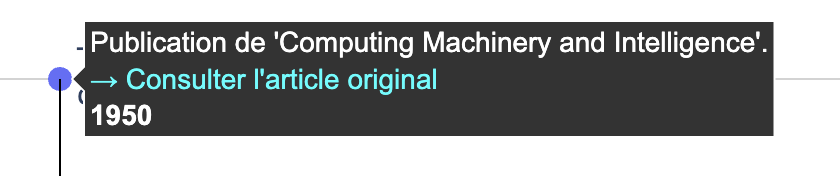

In [127]:
# La ligne suivante trie des données chronologiquement par date, et
# assigne ce résultat à nouveau à la variable « data ». 
data = data.sort_values('Début')

# Enrobons (wrap) le texte des événements afin que la longueur de chaque ligne ne
# dépasse pas 
# plus de 30 caractères.  Nous utilisons la méthode pandas « apply »
# avec une fonction anonyme (lambda), c'est-à-dire une fonction sans nom
# qui n'a pas besoin d'être invoquée pour être exécutée.
data['Événement'] = data['Événement'].apply(lambda x: '<br>'.join(wrap(x, width=30)))

# Création des positions alternées pour les textes
# De cette manière, les étiquettes ne se chevaucheront pas leurs dates
# sont chronologiquement proches.
positions = ['middle right', 'middle left'] * (len(data) // 2 + 1)
positions = positions[:len(data)]

# Position opposée pour le hover (si le texte est à droite, le hover sera à gauche et vice versa)
hover_alignments = ['left' if pos == 'middle right' else 'right' for pos in positions]

# Créons le graphique avec la fonction Plotly « Figure » 
fig = go.Figure()

# Ajoutons des points et des étiquettes et ajoutons leurs paramètres
# pour les afficher adéquatement.
for i, row in enumerate(data.itertuples()):
    fig.add_trace(go.Scatter(
        y=[row.Début],
        x=[0],
        mode='markers+text',
        marker=dict(size=12, symbol='circle'),
        text=[row.Événement],
        textposition=positions[i],
        textfont=dict(size=14),
        showlegend=False,
        hovertemplate="%{customdata}<br><b>%{y|%Y}</b><extra></extra>",
        customdata=[row.Détails],
        hoverlabel=dict(
            bgcolor='rgba(0,0,0,0.8)',
            align=hover_alignments[i], # Position alternée du hover
        ),
    ))

# Traçons la ligne verticale sur laquelle tous les événements seront disposés.
fig.add_trace(go.Scatter(
    y=[data['Début'].min(), data['Début'].max()],
    x=[0, 0],
    mode='lines',
    line=dict(color='black', width=1),
    showlegend=False,
    hoverinfo='skip'
))

# La fonction « update_layout » sert à mettre à jor le graphique avec
# des détails et paramètres importonts: titre affiché sur la ligne de
# temps, hauteur et largeur du graphique, taille de police, couleur de
# fond, etc.  
fig.update_layout(
    title=dict(
        text="Chronologie de quelques événements marquants en IA conversationnelle",
        font=dict(size=20) 
    ),
    width=1000,
    height=800,
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False,
        range=[-3, 3]
    ),
    yaxis=dict(
        title="Date",
        title_font=dict(size=16),
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        autorange="reversed"
    ),
    hoverlabel=dict(
        font_size=14, # taille de police sur les étiquettes flottantes: 14px
    ),
    hovermode='closest',
    hoverdistance=100,
    clickmode='event+select',  # Est supposé rendre le flottement de l'étiquette persistant jusqu'au prochain clic, mais l'interaction est limitée. voir la documentation
    uirevision=True 
)

# N'oublions pas d'afficher le graphique
# fig.show()

# After creating your figure
from IPython.display import HTML

# Export the figure to an HTML file with all required resources
html_string = fig.to_html(include_plotlyjs='cdn', full_html=False)

# Write to file
with open('timeline_visualization.html', 'w') as f:
    f.write(html_string)

# You can also display it directly in the notebook
HTML(html_string)

## Commentaire et conclusion

<h3>Prouesses et limites des capacités actuelles de l'IA générative</h3>

Bien qu'à petite échelle, la construction d'une ligne de
temps préliminaire à une branche précise des technologies numériques
assistée par IA relève plusieurs opportunités, mais aussi de nombreux
défis. 

En date du mois de décembre 2024, de grands modèles d'AI générative tels
que GPT 4o et Claude Sonnet 3.5 affichent toujours des limites considérables à la recherche de ressources fiables, évaluées par les
pairs dans des contextes scientifiques. Il serait possible d'argumenter
que des modèles plus avancés et payants feraient un meilleur travail. Il
serait aussi possible d'envisager que les limites des modèles de
base seront bientôt dépassées et que, dans quelques années ou plus, un agent d'IA générative sera
parfaitement en mesure de faire bien mieux que la plupart des experts.

De nombreux experts en IA soient de cet avis. Par exemple, en décembre
2024, Yann LeCun, scientifique
en chef de l'IA de Meta, a affirmé que l'« intelligence » des systèmes d'IA pourrait
bientôt être égale à celles des humains (Dixit, 11 décembre).
Cela dit, les champs des sciences cognitives et de l'IA n'ont toujours
pas de définition de l'intelligence faisant consensus auprès de tous
les chercheurs et chercheuses de leurs communautés. Sans définitions ou
conventions sur ce qu'est, au juste, l'intelligence chez les humains, les
non-humains, et chez les machines, il est difficile de
clairement répondre aux doutes qui subsistent quant à une telle possibilité. Les
différentes
évaluations et démonstrations des prouesses de l'IA générative tombent
souvent dans la surenchère . Très peu sont adaptées à tous les cas
d'usage. Et les IA spécialisées disponibles sont, à plusieurs égards,
encore loin de remplacer les compétences solidement acquises d'un étudiant ou une étudiante de niveau de
baccalauréat. Par exemple, à partir du site [Perplexity](https://www.perplexity.ai/), un examen des sources données en résultat d'une simple recherche de sources scientifiques
sur l'évolution des agents conversationnels
révèle encore seulement 2 sources universitaires, dont une seule publiée
dans le cadre d'un processus de révision par les pairs. Pourtant,
l'image de marque de la compagnie Perplexity se situe précisément —et
ironiquement— dans la capacité à trouver des résultats de recherche de
haut niveau.

En ce qui concerne la recherche en sciences sociales et humaines (y
compris les sciences de l'administration et de la gestion), force est de
constater que le problème
inhérent, et maintes fois relevé, de la production de données de qualité
à partir d'une sélection experte de sources, restera en manque
de solutions, surtout si elles visent à éliminer toute
intervention humaine. Récemment, Ilya Sustkever, ex-co-fondateur et ancien membre du
conseil de gouvernance d'OpenAI, a d'ailleurs noté que « Nous avons
atteint le pic des données et il n’y en aura plus ... nous devons faire
face aux données que nous avons. Il n’y a qu’un seul Internet »
(Robison, 14 décembre 2024). La
nature stochastique du fonctionnement de grands
modèles de langage actuels et le manque de données massives de qualité rendent le
processus impossible à automatiser de manière aussi efficace sans
investissements humains significatifs. De tels investissements humains en
temps, énergies, et expertises
contrarient le principe et les bénéfices potentiels de toute
automatisation poussée au-delà des scripts d'usages familiers et
de modes de collaboration entre humains et machines déjà bien établis.


L'évolution des technologies numériques numériques relève de contextes
humains et culturels 
complexes et interreliés. Il est impossible d'en donner davantage qu'une
idée très préliminaire et très partielle avec cinq événements. Cela dit,
l'analyse qui vient d'être communiquée ici pourra être augmentée de
manières multiples, dont ... <span style="background-color:yellow;">
    [en 2-3 phrases, à vous de suggérer des pistes et manières
    utiles de pousser plus loin votre exploration. Il peut s'agir de charger
    d'autres données tirées de banques telles que [Wikidata](https://wikidata.org), ou
    encore de de comparer les événements que vous avez relevé avec un autre
    type de donnée historique. Soyez cohérent.e avec votre thème et précis
    dans vos descriptions.]
</span>




## Bibliographie

- Aimé, X. (2017). Intelligence artificielle et psychiatrie : noces d’or entre Eliza et Parry. *L’information psychiatrique*, 93(1), 51‑56. https://stm.cairn.info/revue-l-information-psychiatrique-2017-1-page-51
- Al-Amin, M., Ali, M. S., Salam, A., Khan, A., Ali, A., Ullah, A.,
  Alam, M. N. et Chowdhury, S. K. (2024, 4 février). History of
  generative Artificial Intelligence (AI) chatbots: past, present, and
  future development. *arXiv*. https://doi.org/10.48550/arXiv.2402.05122
- Dixit, P. (2024, 11 décembre). « The real revolution is yet to come »: Meta AI chief Yann LeCun on the future of AI. *Business Today*. https://www.businesstoday.in/technology/news/story/the-real-revolution-is-yet-to-come-meta-ai-chief-yann-lecun-on-the-future-of-ai-456948-2024-12-11
- Lewis, T. (2020, 1 novembre). Elon Musk’s Pig-Brain Implant Is Still a
  Long Way from « Solving Paralysis ». *Scientific American*.
  https://www.scientificamerican.com/article/elon-musks-pig-brain-implant-is-still-a-long-way-from-solving-paralysis/
- Orf, D. (2023, 16 avril). The Turing Test for AI Is Obsolete - Is There a Better Framework? *Popular Mechanics*. https://www.popularmechanics.com/technology/robots/a43328241/turing-test-for-artificial-intelligence-is-obsolete/
- Reuters. (2024, 30 janvier). Elon Musk’s Neuralink implants brain chip
  in first human. *Reuters*.
  https://www.reuters.com/technology/neuralink-implants-brain-chip-first-human-musk-says-2024-01-29/]
- Robison, K. (2024, 14 décembre). OpenAI cofounder Ilya Sutskever says the way AI is built is about to change. *The Verge*. https://www.theverge.com/2024/12/13/24320811/what-ilya-sutskever-sees-openai-model-data-training
- Turing, A. M. (1950). Computing Machinery and Intelligence. *Mind, New
  Series*, 59(236), 433‑460.
- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez,
  A. N., Kaiser, L. et Polosukhin, I. (2017, 5 décembre). Attention Is
  All You Need. *arXiv*. https://doi.org/10.48550/arXiv.1706.03762
- Weizenbaum, J. (1966). ELIZA—a computer program for the study of natural language communication between man and machine. *Commun. ACM*, 9(1), 36‑45. https://doi.org/10.1145/365153.365168
- Zewe, A. (2023, 9 novembre). Explained: Generative AI. *MIT News | Massachusetts Institute of Technology*. https://news.mit.edu/2023/explained-generative-ai-1109
